# YOLO v3 Object Detection

Veamos ahora cómo utilizar lo ultimo en detección de objetos!!!

FUENTE DEL CÓDIGO: https://github.com/xiaochus/YOLOv3

REFERENCE (for original YOLOv3): 

        @article{YOLOv3,  
              title={YOLOv3: An Incremental Improvement},  
              author={J Redmon, A Farhadi },
              year={2018} 
--------
----------
## DEBES VER EL VIDEO PARA CONFIGURAR CORRECTAMENTE EL MODELO Y LOS PESOS. ESTE CUADERNO NO FUNCIONARÁ A MENOS QUE SIGA LA CONFIGURACIÓN EXACTA QUE SE MUESTRA EN EL VIDEO.
-------
-------

In [13]:
import os
import time
import cv2
import numpy as np

In [26]:
import matplotlib.pyplot as plt

In [14]:
from model.yolo_model import YOLO

In [15]:
def process_image(img):
    """Resize, reduce and expand image.

    # Argument:
        img: original image.

    # Returns
        image: ndarray(64, 64, 3), processed image.
    """
    image = cv2.resize(img, (416, 416),
                       interpolation=cv2.INTER_CUBIC)
    image = np.array(image, dtype='float32')
    image /= 255.
    image = np.expand_dims(image, axis=0)

    return image

In [16]:
def get_classes(file):
    """Get classes name.

    # Argument:
        file: classes name for database.

    # Returns
        class_names: List, classes name.

    """
    with open(file) as f:
        class_names = f.readlines()
    class_names = [c.strip() for c in class_names]

    return class_names

In [69]:
def draw(image, boxes, scores, classes, all_classes):
    """Draw the boxes on the image.

    # Argument:
        image: original image.
        boxes: ndarray, boxes of objects.
        classes: ndarray, classes of objects.
        scores: ndarray, scores of objects.
        all_classes: all classes name.
    """
    for box, score, cl in zip(boxes, scores, classes):
        x, y, w, h = box

        top = max(0, np.floor(x + 0.5).astype(int))
        left = max(0, np.floor(y + 0.5).astype(int))
        right = min(image.shape[1], np.floor(x + w + 0.5).astype(int))
        bottom = min(image.shape[0], np.floor(y + h + 0.5).astype(int))

        cv2.rectangle(image, (top, left), (right, bottom), (255, 0, 0), 5)
        cv2.putText(image, '{0} {1:.2f}'.format(all_classes[cl], score),
                    (top, left - 6),
                    cv2.FONT_HERSHEY_DUPLEX ,
                    1.5, (0, 0, 255), 2,
                    cv2.LINE_AA)

        print('class: {0}, score: {1:.2f}'.format(all_classes[cl], score))
        print('box coordinate x,y,w,h: {0}'.format(box))

    print()

In [18]:
def detect_image(image, yolo, all_classes):
    """Use yolo v3 to detect images.

    # Argument:
        image: original image.
        yolo: YOLO, yolo model.
        all_classes: all classes name.

    # Returns:
        image: processed image.
    """
    pimage = process_image(image)

    start = time.time()
    boxes, classes, scores = yolo.predict(pimage, image.shape)
    end = time.time()

    print('time: {0:.2f}s'.format(end - start))

    if boxes is not None:
        draw(image, boxes, scores, classes, all_classes)

    return image

In [20]:
def detect_video(video, yolo, all_classes):
    """Use yolo v3 to detect video.

    # Argument:
        video: video file.
        yolo: YOLO, yolo model.
        all_classes: all classes name.
    """
    video_path = os.path.join("videos", "test", video)
    camera = cv2.VideoCapture(video_path)
    cv2.namedWindow("detection", cv2.WINDOW_AUTOSIZE)

    # Prepare for saving the detected video
    sz = (int(camera.get(cv2.CAP_PROP_FRAME_WIDTH)),
        int(camera.get(cv2.CAP_PROP_FRAME_HEIGHT)))
    fourcc = cv2.VideoWriter_fourcc(*'mpeg')

    
    vout = cv2.VideoWriter()
    vout.open(os.path.join("videos", "res", video), fourcc, 20, sz, True)

    while True:
        res, frame = camera.read()

        if not res:
            break

        image = detect_image(frame, yolo, all_classes)
        cv2.imshow("detection", image)

        # Save the video frame by frame
        vout.write(image)

        if cv2.waitKey(110) & 0xff == 27:
                break

    vout.release()
    camera.release()
    

In [92]:
#Create an instance of that YOLO model
yolo = YOLO(0.6, 0.5)
file = 'data/coco_classes.txt'
all_classes = get_classes(file)

# Detecting on Images

* Image with People, One car and one Canoa

In [70]:
f = 'personas_car_monte.jpg'
path = 'images/'+f
image = cv2.imread(path)
image = detect_image(image, yolo, all_classes)
#Read the resoults of the image
cv2.imwrite('images/res/' + f, image)

time: 8.16s
class: person, score: 0.99
box coordinate x,y,w,h: [1537.3681891   920.58941126  372.77772009  758.58143926]
class: person, score: 0.89
box coordinate x,y,w,h: [1001.15182757  895.49654722  317.61952132  854.80811596]
class: car, score: 0.76
box coordinate x,y,w,h: [ 581.81179762 1001.25831366 1650.40068269  609.10033107]
class: aeroplane, score: 0.70
box coordinate x,y,w,h: [999.51379359 842.06261396 994.43601966 308.56763482]



True

In [71]:
img = cv2.imread('images/res/personas_car_monte.jpg')
fix_img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

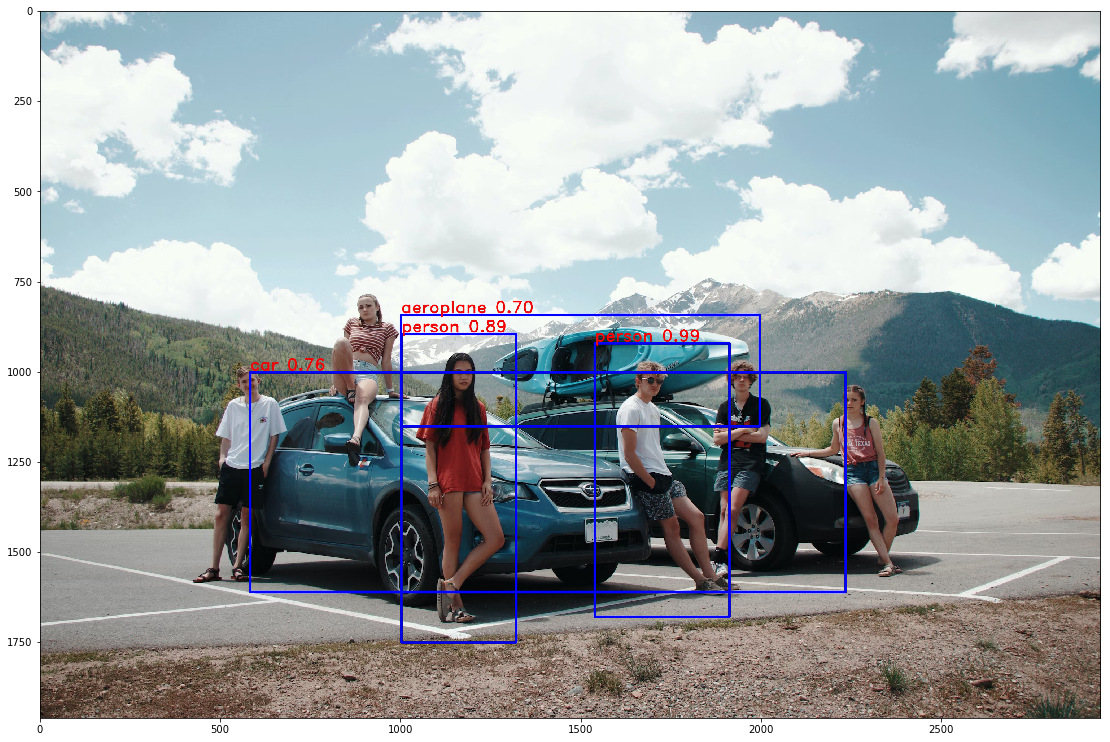

In [72]:
fig = plt.figure(figsize=(19,19))
ax = fig.add_subplot(111)
ax.imshow(fix_img)

* Image with 3 person and a car

In [73]:
f = 'personas_coche.jpg'
path = 'images/'+f
image1 = cv2.imread(path)
image1 = detect_image(image1, yolo, all_classes)
#Read the resoults of the image
cv2.imwrite('images/res/' + f, image1)

time: 7.76s
class: person, score: 1.00
box coordinate x,y,w,h: [316.61967874 244.39051867 324.4271028  595.93056679]
class: person, score: 0.99
box coordinate x,y,w,h: [887.07556129 221.29926562 243.7343958  606.55196905]
class: car, score: 0.87
box coordinate x,y,w,h: [ 38.7640357  375.22158623 733.99179697 429.74614263]



True

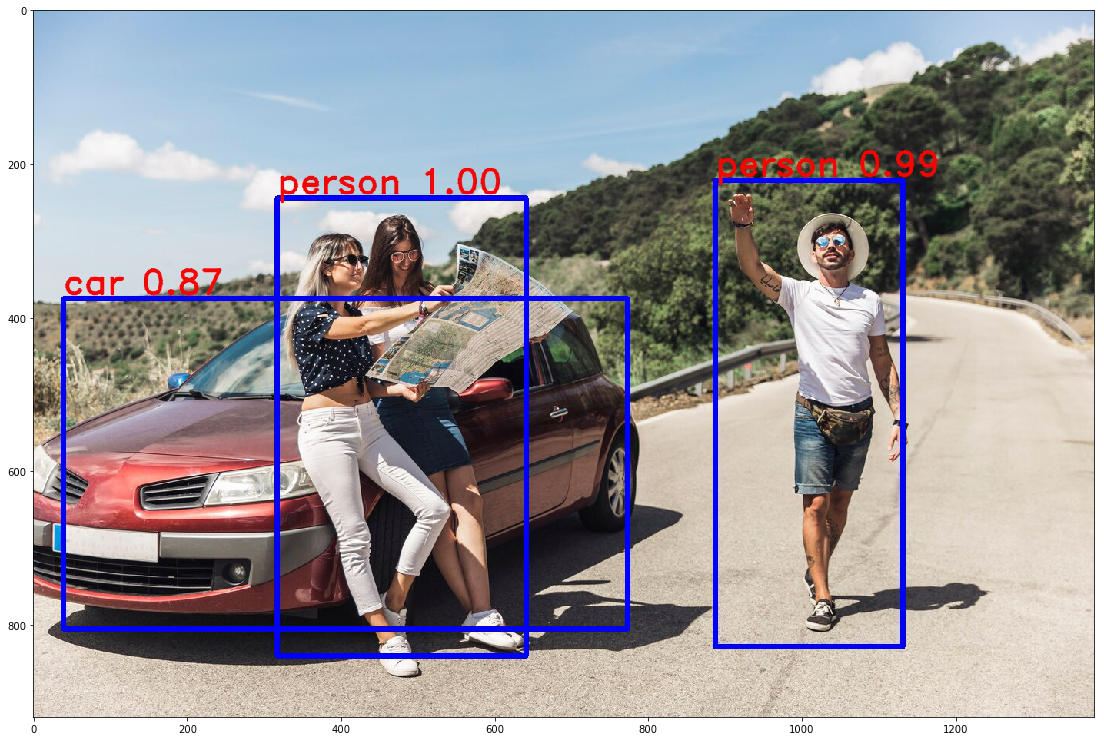

In [74]:
img1 = cv2.imread('images/res/personas_coche.jpg')
fix_img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)

fig1 = plt.figure(figsize=(19,19))
ax1 = fig1.add_subplot(111)
ax1.imshow(fix_img1)

* Image with a Boy and a Car

In [75]:
f = 'boy_car.jpg'
path = 'images/'+f
image2 = cv2.imread(path)
image2 = detect_image(image2, yolo, all_classes)
#Read the resoults of the image
cv2.imwrite('images/res/' + f, image2)

time: 8.28s
class: person, score: 0.86
box coordinate x,y,w,h: [1245.81889263 1247.72440016 1075.62478977 2788.46858382]
class: car, score: 0.98
box coordinate x,y,w,h: [ 181.34013203 1526.1376673  2488.69151384 2329.03576732]



True

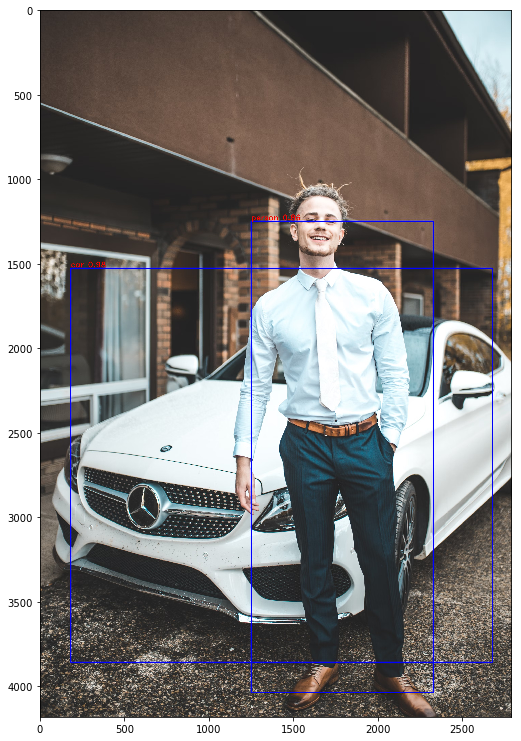

In [81]:
img2 = cv2.imread('images/res/boy_car.jpg')
fix_img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)

fig2 = plt.figure(figsize=(13,13))
ax2 = fig2.add_subplot(111)
ax2.imshow(fix_img2)

* Image with People and a car on the street

In [77]:
f = 'street_car.jpg'
path = 'images/'+f
image3 = cv2.imread(path)
image3 = detect_image(image3, yolo, all_classes)
#Read the resoults of the image
cv2.imwrite('images/res/' + f, image3)

time: 8.72s
class: truck, score: 0.77
box coordinate x,y,w,h: [1808.38773155 1154.98556137 1072.20769787  916.64910793]



True

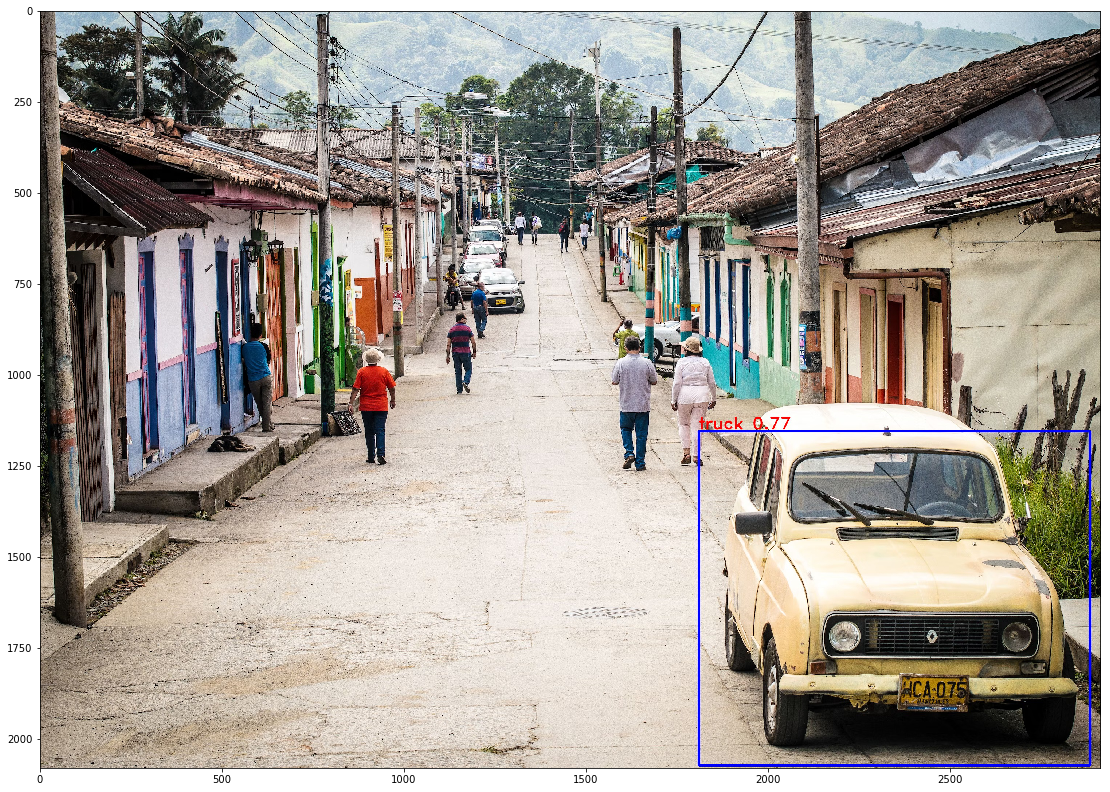

In [78]:
img3 = cv2.imread('images/res/street_car.jpg')
fix_img3 = cv2.cvtColor(img3,cv2.COLOR_BGR2RGB)

fig3 = plt.figure(figsize=(19,19))
ax3 = fig3.add_subplot(111)
ax3.imshow(fix_img3)

Modificar instancia de YOLO de 0.6 q 0.3


In [96]:
#Create an instance of that YOLO model
yolo2 = YOLO(0.3, 0.5)
file = 'data/coco_classes.txt'
all_classes = get_classes(file)

c:\Users\plame\anaconda3\envs\cvcourse_windows\lib\site-packages\keras\engine\saving.py:269: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [97]:
f = 'street_car2.jpg'
path = 'images/'+f
imageX = cv2.imread(path)
imageX = detect_image(imageX, yolo2, all_classes)
#Read the resoults of the image
cv2.imwrite('images/res/' + f, imageX)

time: 38.96s
class: person, score: 0.59
box coordinate x,y,w,h: [1093.03030396  846.77622795  112.46459341  199.99233246]
class: truck, score: 0.77
box coordinate x,y,w,h: [1808.38773155 1154.98556137 1072.20769787  916.64910793]



True

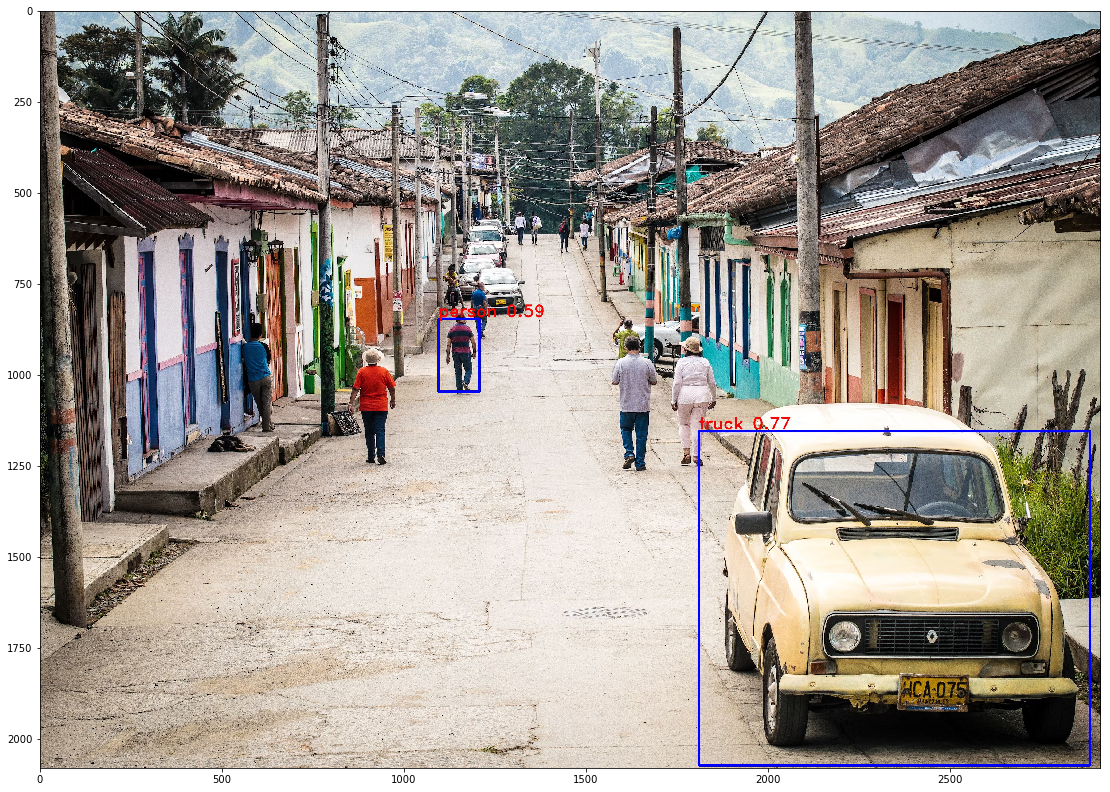

In [98]:
imgX = cv2.imread('images/res/street_car2.jpg')
fix_imgX = cv2.cvtColor(imgX,cv2.COLOR_BGR2RGB)

figX = plt.figure(figsize=(19,19))
axX = figX.add_subplot(111)
axX.imshow(fix_imgX)